# Perceptrons

Perceptrons are the fundamental building block of neural networks. They were introduced by Rosenblatt in 1960, <a href="https://ieeexplore.ieee.org/abstract/document/4066017">https://ieeexplore.ieee.org/abstract/document/4066017</a>.

The material in this notebook is adapted from the text <a href="https://link.springer.com/content/pdf/10.1007/978-3-319-94463-0.pdf">Neural Networks and Deep Learning</a> by Charu C. Aggarawal.

## What we will accomplish

In this notebook we will:
- Discuss the foundation of the neural network, the perceptron,
- Demonstrate the fundamental limitation of the perceptron and
- Show how to build a perceptron in `sklearn`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## What is an artificial neural network?

Neural networks are a technique that that loosely tries to mimic the network of neurons that make up brains. The idea being that we are trying to create learning algorithms that copy in some very loose sense how humans learn.

The building blocks of the vast complex network of the brain is a single neuron, while the building blocks of an artificial neural network is a <i>perceptron</i>.

We start at the beginning with this simple building block and then expand into slightly more complex neural networks in the next notebook.

## The perceptron

We will learn in the setting of a classification problem, but be aware that neural nets can be applied in a variety of settings.

Suppose we have $n$ observations of $m$ features stored in $m$ $n$ by $1$ column vectors, $X_1, X_2, \dots, X_m$, and let $X = \left(X_1 | X_2 | \dots |X_m\right)$, and we want to predict some target $y$. <i>Note: we can include a column of $1$s, but we will leave it out for this formulation. When this is done we say that the perceptron has a bias term.</i>

Let $\sigma$ be some nonlinear function from $\mathbb{R} \rightarrow \mathbb{R}$. For classification we take $\sigma = \text{sgn}$, the sign function, i.e. $\sigma(x) = 1$ if $x>0$ and $\sigma(x) = -1$ if $x<0$. In the language of neural networks we call $\sigma$ an activation function.

Perceptrons make an estimation of $y$, called $\hat{y}$, like so
$$
\hat{y} = \sigma(w_1 X_1 + w_2  X_2 + \dots + w_m X_m) = \sigma(Xw),
$$
where in a potential abuse of notation I take $\sigma(Xw)$ to mean $\sigma$ applied to each of the $n$ entries of $Xw$, and $w=\left(w_1, w_2, \dots, w_m\right)^T$.

If I let $x=\left(x_1,x_2,\dots,x_m\right)$ denote a single observation then I can picture this like so.

<img src = "lecture-12-assets/perceptron.png" width="50%"></img>

This sort of diagram is known as the <i>architecture</i> of the neural network. <i>A perceptron with a bias term would have a "bias" node added whose weight is denoted with a $b$.</i>

The column of nodes are referred to as the input layer because these are the inputs into the perceptron, the output node has both $\Sigma$ and $\sigma$ because this is where our weighted sum ($\Sigma$) and nonlinear transformation ($\sigma$) occurs.  

Note the while we did not include a bias term (adding a constant to $Xw$) this can easily be done, we just left it out for simplicity.

### Finding the $w$

So how do we find the weights?

First the weights are randomly selected. Then you use a single data point from the training set, $X^{(i)}$, and you calculate the error, $y^{(i)}-\hat{y}^{(i)}$.

You then update $w$ like so:
$$
w_{\text{update}} = w_{\text{current}} + \alpha (y^{(i)}-\hat{y}^{(i)}) X^{(i)} 
$$

$\alpha$ is the learning rate of the network.

The perceptron will cycle through all of the training points and continue to adjust the weights until it converges to a weight vector $w$. Each cycle through the training set is called an <i>epoch</i>. 

Typically the training points are chosen at random without replacement.

Note, that this can be performed small batches of training points, at which point the batches are chosen randomly without replacement.

Also note that the algorithm can be rewritten to work in parallel, <a href="http://www.cs.cmu.edu/~wcohen/10-605/parallel-perceptrons.pdf">http://www.cs.cmu.edu/~wcohen/10-605/parallel-perceptrons.pdf</a> and <a href="https://www.sciencedirect.com/science/article/pii/S0167819106800177">https://www.sciencedirect.com/science/article/pii/S0167819106800177</a>.


Also for a very simple example of training the perceptron check out this reference starting on page 10, <a href="http://hagan.okstate.edu/4_Perceptron.pdf">http://hagan.okstate.edu/4_Perceptron.pdf</a>.

## Perceptrons in `sklearn`

Let's now get some brief practice implementing a perceptron in `sklearn`. We do not spend much time here for reasons that will become clear.

Here are the docs on `sklearn`'s implementation of perceptrons, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html</a>.

In [2]:
## Perceptron is stored in sklearn.linear_model
from sklearn.linear_model import Perceptron

We will use the perceptron to build a classifier on this phony data set. We will just use the defaults from the `sklearn` Perceptron object.

In [3]:
## Generate some random input data
np.random.seed(324)

X = np.random.random((200,2))

## When x_1 - x_2 < -.05 classify as -1
## when x_1 - x_2 > -.05 classify as 1
y = np.zeros(200)
y[X[:,0] - X[:,1] > 0] = 1

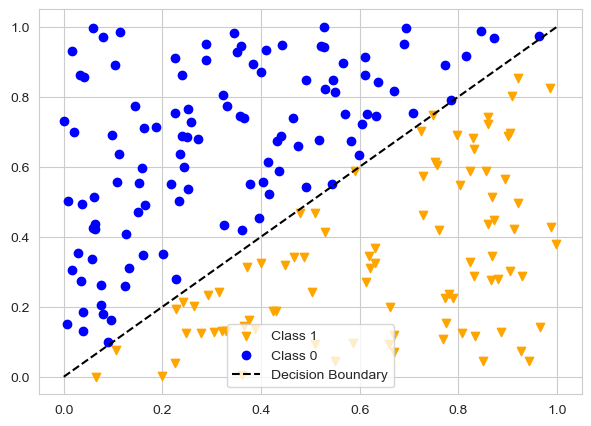

In [4]:
plt.figure(figsize=(7,5))


plt.scatter(X[y==1, 0],
            X[y==1, 1],
            c='orange',
            marker='v',
            label = "Class 1")
plt.scatter(X[y==0, 0],
            X[y==0, 1],
            c='blue',
            label = "Class 0")

plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100),
         'k--',
         label = "Decision Boundary")

plt.legend(fontsize=10)

plt.show()

In [5]:
## We make a perceptron object
perc = Perceptron()

In [6]:
## We fit the object
perc.fit(X, y)

Perceptron()

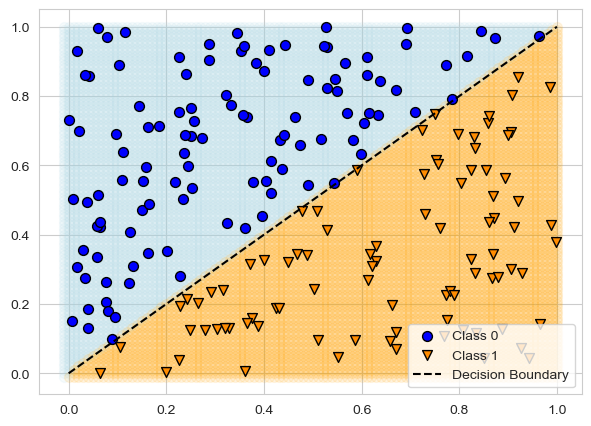

In [7]:
xx1, xx2 = np.meshgrid(np.arange(-.01, 1.01, .01),
                          np.arange(-.01, 1.01, .01))

X_pred = np.zeros((len(xx1.reshape(-1,1)), 2))
X_pred[:,0] = xx1.flatten()
X_pred[:,1] = xx2.flatten()

preds = perc.predict(X_pred)

plt.figure(figsize=(7,5))

plt.scatter(X_pred[preds==0,0],
            X_pred[preds==0,1],
            alpha=.1,
            c='lightblue',
            s=50)
plt.scatter(X_pred[preds==1,0],
            X_pred[preds==1,1],
            alpha=.1,
            c='orange',
            s=50)


plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='b',
            label = "Class 0",
            edgecolor='k')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='darkorange',
            marker = 'v',
            label = "Class 1",
           edgecolor='k')

plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100),
         'k--',
         label = "Decision Boundary")


plt.legend(fontsize=10)

plt.show()

Let's look at another example.

In [8]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([1,0,0,1])

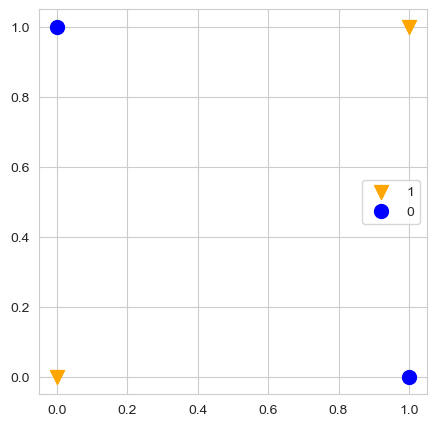

In [9]:
plt.figure(figsize=(5,5))

plt.scatter(X[y == 1,0],
            X[y == 1,1], 
            c = 'orange', 
            marker='v', 
            label = "1", 
            s=100)
plt.scatter(X[y == 0,0],
            X[y == 0,1], 
            c = 'blue', 
            label = "0", 
            s=100)

plt.legend(fontsize=10)

plt.show()

In [10]:
# Make a model object
# call the variable p
p = Perceptron()

# Fit the model here
p.fit(X, y)

# Make a prediction
print("Actual data", y)
print("Predicted Data", p.predict(X))

Actual data [1 0 0 1]
Predicted Data [0 0 0 0]


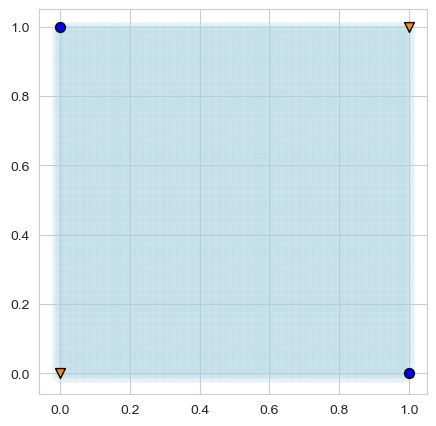

In [11]:
xx1, xx2 = np.meshgrid(np.arange(-.01, 1.01, .01),
                          np.arange(-.01, 1.01, .01))

X_pred = np.zeros((len(xx1.reshape(-1,1)), 2))
X_pred[:,0] = xx1.flatten()
X_pred[:,1] = xx2.flatten()

preds = p.predict(X_pred)

plt.figure(figsize=(5,5))

plt.scatter(X_pred[preds==0,0],
            X_pred[preds==0,1],
            alpha=.1,
            c='lightblue',
            s=50)
plt.scatter(X_pred[preds==1,0],
            X_pred[preds==1,1],
            alpha=.1,
            c='orange',
            s=50)


plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='b',
            label = "Class 0",
            edgecolor='k')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='darkorange',
            marker = 'v',
            label = "Class 1",
           edgecolor='k')


plt.show()

##### How did it do?

<i>Not good</i>.

A single perceptron is not capable of separating data sets that are not linearly separable. This severely hurt interest in the method back in the 1950s and 60s, <a href="https://en.wikipedia.org/wiki/Perceptron">https://en.wikipedia.org/wiki/Perceptron</a>. 

However, if your data is linearly separable there is a proof that guarantees the perceptron will converge as well as an upper bound on the number of epochs it must endure to get there, see the previous wikipedia link.

The linear limitation is precisely why we now end our time with the perceptron and move on to more complicated neural network architectures.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)